In [108]:
# All Import statements
import pandas as pd 
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [110]:
#Load the CSV file
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [111]:
# 3.a Shape of the data
data.shape

(1338, 7)

In [112]:
# 3.b Datatype of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
#  3.c Checking the presence of missing values
# Substract rows -with the number of values (not null) in each columns
data.shape[0] - data.count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### No null Value in any column

In [113]:
# 3.d 5 point summary of numerical attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [114]:
#Print min
min = data.describe().iloc[3:4, :]
print(min)
#Print Quartile 1
quartile1 = data.describe().iloc[4:5, :]
print(quartile1)
#Print Median
median = data.describe().iloc[5:6, :]
print(median)
#Print Quartile 3
quartile3 = data.describe().iloc[6:7, :]
print(quartile3)
#Print Max
max = data.describe().iloc[7:, :]
print(max)

      age    bmi  children    charges
min  18.0  15.96       0.0  1121.8739
      age       bmi  children     charges
25%  27.0  26.29625       0.0  4740.28715
      age   bmi  children   charges
50%  39.0  30.4       1.0  9382.033
      age       bmi  children       charges
75%  51.0  34.69375       2.0  16639.912515
      age    bmi  children      charges
max  64.0  53.13       5.0  63770.42801


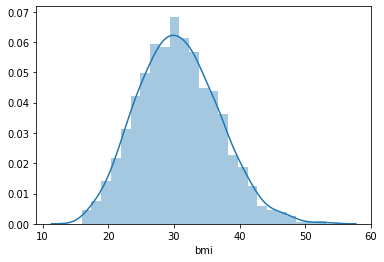

In [115]:
# 3.e Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
#Distribution of BMI
sns.distplot(data['bmi']);

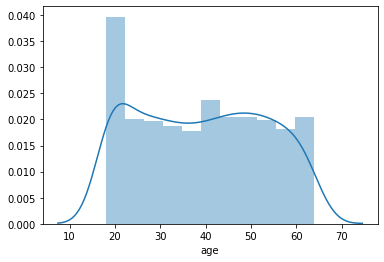

In [116]:
#Distribution of age
sns.distplot(data['age']);

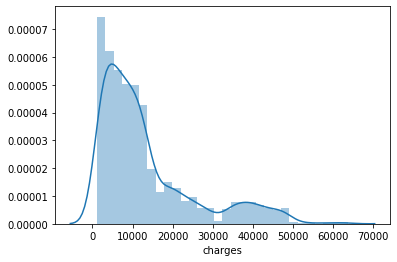

In [117]:
#Distribution of charges
sns.distplot(data['charges']);

In [118]:
# 3.f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ column
print('Skewness of bmi', data.skew(axis = 0)['bmi'])
print('Skewness of age', data.skew(axis = 0)['age'])
print('Skewness of charges', data.skew(axis = 0)['charges'])

Skewness of bmi 0.2840471105987448
Skewness of age 0.05567251565299186
Skewness of charges 1.5158796580240388


In [119]:
#3.g Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges' columns
# Outliers are there is Min < Q1 - 1.5*iqr or Max > q3 + 1.5*iqr
print('bmi has outliers', quartile1['bmi'].values[0] - stats.iqr(data['bmi'])*1.5 > min['bmi'].values[0] or quartile3['bmi'].values[0] + stats.iqr(data['bmi'])*1.5 < max['bmi'].values[0])
print('age has outliers', quartile1['age'].values[0] - stats.iqr(data['age'])*1.5 > min['age'].values[0] or quartile3['age'].values[0] + stats.iqr(data['age'])*1.5 < max['age'].values[0])
print('charges has outliers', quartile1['charges'].values[0] - stats.iqr(data['charges'])*1.5 > min['charges'].values[0] or quartile3['charges'].values[0] + stats.iqr(data['charges'])*1.5 < max['charges'].values[0])

bmi has outliers True
age has outliers False
charges has outliers True


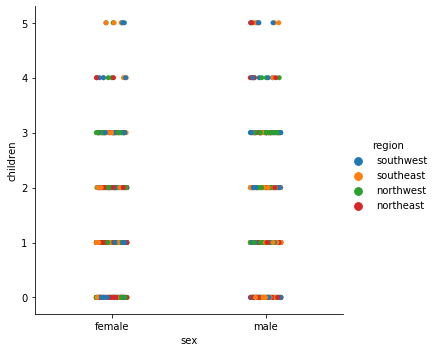

In [125]:
# 3.h Distribution of categorical columns
sns.catplot(x='sex', y='children', hue='region', data=data)

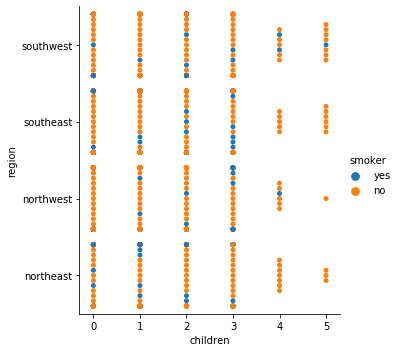

In [127]:
sns.catplot(x='children', y='region', hue='smoker', data=data, kind='swarm')

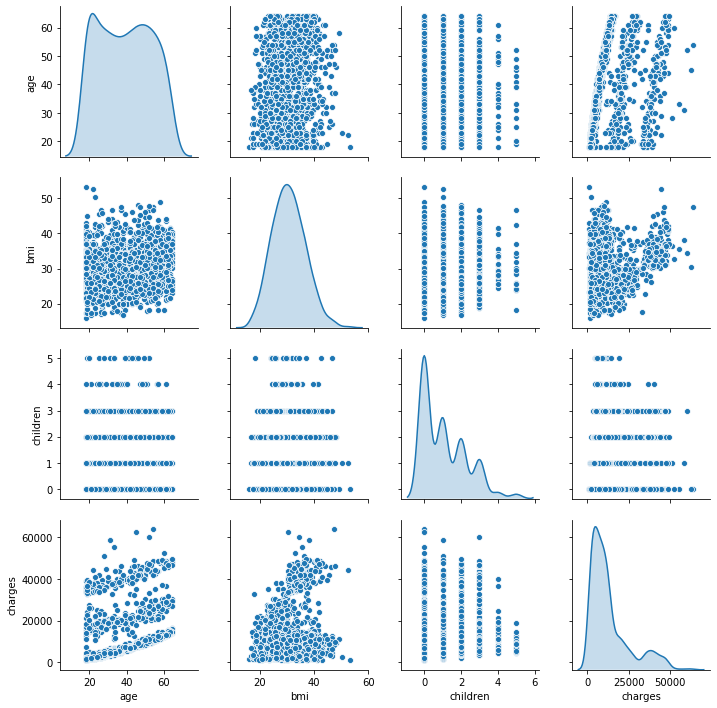

In [13]:
#3.i Pair plot that includes all the columns of the data  frame 
sns.pairplot(data,diag_kind='kde')

In [130]:
#4.a Do charges of people who smoke differ significantly  from the people who don't?  
#Hypothesis testing -2 sample test
#h0: Mean of smokers charges - Mean of non-smokers charges == 0
#hA: Mean of smokers charges != Mean of non-smokers charges != 0
chargesSmokers = data[data.smoker == 'yes']['charges']
chargesNonSmokers = data[data.smoker == 'no']['charges']
t_statistic, p_value  =  stats.ttest_ind(chargesSmokers,chargesNonSmokers)
print('P Value %1.3f' % p_value)

P Value 0.000


Since the pValue is close to 0 hence null hypothesis holds true i.e charges of smokers is not significantly different

In [49]:
#4.b Does bmi of males differ significantly from that of  females?  
#Hypothesis testing -2 sample test
#h0: Mean bmi of males - Mean bmi of females == 0
#hA: Mean bmi of males - Mean bmi of females != 0
bmiMales = data[data.sex == 'male']['bmi']
bmiFemales = data[data.sex == 'female']['bmi']
t_statistic, p_value  =  stats.ttest_ind(bmiMales,bmiFemales)
print('P Value %1.3f' % p_value)

P Value 0.090


Since Pvalue is significantly different 9% which is greater than significance level of 5% hence we can reject null hypothesis i.e BMI of males and females are significantly different.

In [88]:
#4.c Is the proportion of smokers significantly different in different gender
data.smoker = data.smoker.replace('yes', 1).replace('no', 0)
#Hypothesis testing -2 sample test
#h0: Mean smokers males - Mean smokers females == 0
#hA: Mean smokers males - Mean smokers females != 0
smokersMales = data[data.sex == 'male']['smoker']
smokersFemales = data[data.sex == 'female']['smoker']
t_statistic, p_value  =  stats.ttest_ind(smokersMales,smokersFemales)
print('P Value %1.3f' % p_value)

P Value 0.005


Since the pValue is very low hence we can't reject the null hypothesis hence the proportion of smokers in male and female is not significant.

In [103]:
#4.d Is the distribution of bmi across women with no  children, one child and two children, the same ?
bmiWomenChild=data[data.sex=='female'][data.children <= 2]
#Hypothesis testing -3 sample anova test
#h0: There is no significane difference as compared in data set i.e bmi of women with 0,1or 2 children
#hA: There is significat difference in bmi between 0, 1 or 2 childre,
mod = ols('children ~ bmi', data = bmiWomenChild).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df         F   PR(>F)
bmi         0.043290    1.0  0.068411  0.79376
Residual  356.896639  564.0       NaN      NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Since P value 0.794 is significantly high than significant level 5% hence we can reject the null hypothesis which implies there is a significant difference in bmi